<a href="https://colab.research.google.com/github/gplinkage/DataScienceBootCamp/blob/main/Class%20Notes/Notes/BDS35_02OCT_Practice_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
df=pd.read_csv('/content/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


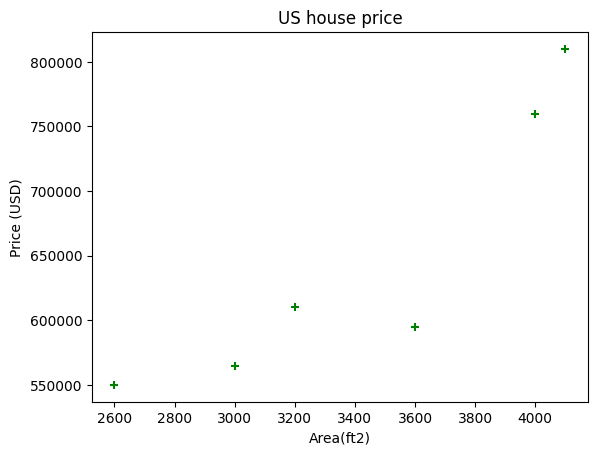

In [ ]:
%matplotlib inline
plt.scatter(df.area, df.price, color = 'green', marker= '+')
plt.xlabel('Area(ft2)')
plt.ylabel('Price (USD)')
plt.title('US house price')
plt.show()

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)

LinearRegression()

In [ ]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [ ]:
reg.coef_

array([135.78767123])

In [ ]:
reg.intercept_

180616.43835616432

In [ ]:
(135.78767123*3300)+180616.43835616432

628715.7534151643

In [10]:
df= pd.read_csv('/content/homeprices-2.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [11]:
import math
median_bedrooms= math.floor(df.bedrooms.median())
median_bedrooms

4

In [12]:
df.bedrooms= df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [13]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'age']], df.price)

LinearRegression()

In [14]:
reg.predict([[3300,4,15]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([636208.81195671])

In [15]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [16]:
reg.intercept_

221323.00186540396

In [17]:
112.062*3300+23388.88007794*4+-3231.71790863*15+221323.00186540396

636207.353547714

In [18]:
df= pd.read_csv('/content/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [19]:
df['experience'] = df['experience'].fillna(0)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [20]:
mean_score = df['test_score(out of 10)'].mean().round(0)
mean_score

8.0

In [21]:
df['test_score(out of 10)']=df['test_score(out of 10)'].fillna(mean_score)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [22]:
# df['experience'] = df['experience'].replace('five', 5)
# df['experience'] = df['experience'].replace('two', 2)
# df['experience'] = df['experience'].replace('seven', 7)
# df['experience'] = df['experience'].replace('three', 3)
# df['experience'] = df['experience'].replace('ten', 10)
# df['experience'] = df['experience'].replace('eleven', 11)
# df
experience_mapping = {
    'five': 5,
    'two': 2,
    'seven': 7,
    'three': 3,
    'ten': 10,
    'eleven': 11
}

df['experience'] = df['experience'].replace(experience_mapping)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [ ]:
df = df.drop('salary(USD)', axis =1)

In [24]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [26]:
reg = linear_model.LinearRegression()
reg.fit(df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [27]:
reg.predict([[3, 10, 7]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([60069.86899563])

In [28]:
reg.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [29]:
reg.intercept_

17737.263464337688

In [30]:
2812.95487627*3+1845.70596798*10+2205.24017467*7+17737.263464337688

60069.86899563769

In [32]:
import pickle

with open('model_pickle', 'wb') as f:
  pickle.dump(reg, f)

In [35]:
with open('model_pickle','rb') as f:
  mp = pickle.load(f)

In [37]:
mp.predict([[3, 10, 7]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([60069.86899563])